In [89]:
import pandas as pd
import numpy as np
from scipy import stats 
from scipy.stats import shapiro, anderson, kstest,jarque_bera, normaltest , levene,bartlett

In [90]:
train = pd.read_csv('./datasets/전처리완료/코스닥_train_std.csv',index_col=0)
train['target_1'] = train['target_1'].astype(int)
train['target_2'] = train['target_2'].astype(int)
train['target_3'] = train['target_3'].astype(int)
수치형_col = train.select_dtypes(float)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5861 entries, 0 to 5860
Data columns (total 77 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   target_1               5861 non-null   int32  
 1   target_2               5861 non-null   int32  
 2   target_3               5861 non-null   int32  
 3   회계년도                   5861 non-null   int64  
 4   회사명                    5861 non-null   object 
 5   거래소코드                  5861 non-null   int64  
 6   산업군                    5861 non-null   object 
 7   자본                     5861 non-null   float64
 8   차입금의존도                 5861 non-null   float64
 9   유보율                    5861 non-null   float64
 10  현금비율                   5861 non-null   float64
 11  부채비율                   5861 non-null   float64
 12  당좌비율                   5861 non-null   float64
 13  순운전자본비율                5861 non-null   float64
 14  영업손익                   5861 non-null   float64
 15  감가상각

---
## 정규성 검정
---

In [91]:
# 정규성 검정을 하나의 함수로
def normal_test(test_name,x):
    normal = []
    notnormal = []
    if test_name == 'shapiro':
        for var in x.columns :
            stat, p  = shapiro(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'anderson':
        for var in x.columns :
            result  = anderson(x[var].values,dist='norm')
            normality = 0
            for i in range(len(result.critical_values)):
                # sl, cv = result.significance_level[i], result.critical_values[i]
                if result.statistic < result.critical_values[i]:
                    normality +=1
                else :
                    normality +=0
            if normality > 2.5 :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'kstest':
        for var in x.columns :
            stat,p  = kstest(x[var].values, "norm")
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    
    elif test_name == 'jarque_bera':
        for var in x.columns :
            stat,p  = jarque_bera(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'normaltest':
        for var in x.columns :
            stat, p  = normaltest(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    else:
        pass
    return pd.DataFrame(normal, columns = ['normal']),pd.DataFrame(notnormal, columns = ['notnormal'])


In [92]:
normal_test('kstest',수치형_col)

(    normal
 0  순운전자본비율,
    notnormal
 0         자본
 1     차입금의존도
 2        유보율
 3       현금비율
 4       부채비율
 ..       ...
 64    로그이자비용
 65     로그매출액
 66      로그부채
 67    로그금융원가
 68    로그시가총액
 
 [69 rows x 1 columns])

---
## 등분산성검정
---

In [93]:
train = pd.read_csv('./datasets/전처리완료/코스닥_train_std.csv',index_col=0)
train['target_1'] = train['target_1'].astype(int)
train['target_3'] = train['target_3'].astype(int)
train.info()
수치형_col = train.select_dtypes(float)
col_int = 수치형_col.columns.to_list()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5861 entries, 0 to 5860
Data columns (total 77 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   target_1               5861 non-null   int32  
 1   target_2               5861 non-null   float64
 2   target_3               5861 non-null   int32  
 3   회계년도                   5861 non-null   int64  
 4   회사명                    5861 non-null   object 
 5   거래소코드                  5861 non-null   int64  
 6   산업군                    5861 non-null   object 
 7   자본                     5861 non-null   float64
 8   차입금의존도                 5861 non-null   float64
 9   유보율                    5861 non-null   float64
 10  현금비율                   5861 non-null   float64
 11  부채비율                   5861 non-null   float64
 12  당좌비율                   5861 non-null   float64
 13  순운전자본비율                5861 non-null   float64
 14  영업손익                   5861 non-null   float64
 15  감가상각

In [94]:
def homoscedasticity_test(df, col,tool):
        dict_1 = {"변수" : [], "p_val" : [], "T" : [] }
        dict_2 = {"변수" : [], "p_val" : [], "T" : [] }
        if tool == "levene":
                for i in col:
                        T, p_val =levene(df[df['target_2']==1][i], df[df['target_2']==0][i]) 
                        dict_1["변수"].append(i)
                        dict_1["p_val"].append(p_val)
                        dict_1["T"].append(T)

                return  pd.DataFrame(dict_1)

        if tool == "bartlett":
                for i in col:
                        T, p_val =bartlett(df[df['target_2']==1][i], df[df['target_2']==0][i]) 
                        dict_2["변수"].append(i)
                        dict_2["p_val"].append(p_val)
                        dict_2["T"].append(T)

                        
                return pd.DataFrame(dict_2) 


In [95]:
## 정규성을 따를때 등분산성 검정
bartlett = homoscedasticity_test(수치형_col,col_int,"bartlett")
bartlett[bartlett['p_val']>0.05]
## 그러나 위에 정규성 검정에서 순운전자본비율을 제외한 변수에서 정규성이 없음

c:\Users\msi\anaconda3\lib\site-packages\scipy\stats\_morestats.py:2507: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
c:\Users\msi\anaconda3\lib\site-packages\scipy\stats\_morestats.py:2507: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


,변수,p_val,T
28,합계_기말인원(명),0.899092,0.016081
29,외국인지분율,0.570911,0.321160
30,대주주지분율,0.681235,0.168739
39,장단기금리차,0.343023,0.899102
40,cpi,0.176609,1.825930
51,RD,0.428922,0.625740
58,FINDEF,0.096841,2.756808
59,PER변화율,0.468472,0.525578
65,로그자산,0.487893,0.481170
68,로그부채,0.276157,1.185904


In [96]:
# 정규성을 따르지 않을때 등분산성 검정
levene = homoscedasticity_test(수치형_col, col_int,"levene")
등분산변수 = levene[levene['p_val']>0.05]['변수'].to_list()
이분산변수 = levene[levene['p_val']<0.05]['변수'].to_list()

levene[levene['p_val']>0.05]

c:\Users\msi\anaconda3\lib\site-packages\scipy\stats\_morestats.py:2643: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom


,변수,p_val,T
18,유형자산회전율,0.590431,0.289704
19,재고자산회전률,0.761622,0.092031
25,금융수익,0.750830,0.100844
26,법인세비용차감전순이익,0.646273,0.210654
27,당기순이익,0.210519,1.568200
30,대주주지분율,0.060575,3.522936
31,단기차입금,0.185428,1.753990
32,유동성장기부채,0.080863,3.048517
39,장단기금리차,0.237229,1.397271
40,cpi,0.107563,2.590455


---
##t-test
---

In [97]:
import scipy.stats as stats

def t_test(df,col,tool,alpha=0.05):
    dict_1 = {'변수':[],'p_val':[],'t-val':[]}
    dict_2 = {'변수':[],'p_val':[],'t-val':[]}
    if tool == 'student':
        for i in col:
            t_statistic, p_value = stats.ttest_ind(df[df['target_2']==1][i], df[df['target_2']==0][i])
            dict_1["변수"].append(i)
            dict_1["p_val"].append(p_value)
            dict_1["t-val"].append(t_statistic)

            list = pd.DataFrame(dict_1)
        return list

    if tool == 'welch':
        for i in col:
            t_statistic, p_value = stats.ttest_ind(df[df['target_2']==1][i], df[df['target_2']==0][i],equal_var=False)
            dict_2["변수"].append(i)
            dict_2["p_val"].append(p_value)
            dict_2["t-val"].append(t_statistic)

            list = pd.DataFrame(dict_2)
        return list

In [98]:
## 등분산성 t-test
student = t_test(수치형_col,등분산변수,'student')

student_변수  = student[student['p_val']<0.05]['변수'].to_list()
student[student['p_val']<0.05]

,변수,p_val,t-val
3,법인세비용차감전순이익,4.274797e-54,-15.647095
4,당기순이익,2.402030e-65,-17.287188
5,대주주지분율,3.906897e-43,-13.881911
13,영업현금흐름-단기차입급,2.810828e-04,-3.634339
14,로그자산,3.312950e-28,-11.070581
15,로그매출액,4.195011e-46,-14.379744
16,로그부채,2.601073e-03,-3.012623
17,로그금융원가,1.246616e-06,4.853154
18,로그시가총액,1.256635e-34,-12.353371


In [99]:
## 이분산성 t-test
welch = t_test(수치형_col,이분산변수,'welch')


welch_변수  = welch[welch['p_val']<0.05]['변수'].to_list()
welch[welch['p_val']<0.05]

,변수,p_val,t-val
0,자본,4.214610e-113,-27.592691
1,차입금의존도,2.800111e-27,12.189686
2,유보율,1.873680e-105,-29.377654
3,현금비율,4.456514e-18,-9.276788
4,부채비율,1.117511e-18,9.577904
5,당좌비율,1.590027e-18,-9.402419
6,순운전자본비율,5.082702e-31,-13.279517
7,영업손익,4.031098e-82,-25.353195
8,감가상각비,4.219074e-09,-6.043819
9,EBITDA,5.849972e-69,-22.262965


In [100]:
t_검정변수 = student_변수 + welch_변수
t_검정변수

['법인세비용차감전순이익',
 '당기순이익',
 '대주주지분율',
 '영업현금흐름-단기차입급',
 '로그자산',
 '로그매출액',
 '로그부채',
 '로그금융원가',
 '로그시가총액',
 '자본',
 '차입금의존도',
 '유보율',
 '현금비율',
 '부채비율',
 '당좌비율',
 '순운전자본비율',
 '영업손익',
 '감가상각비',
 'EBITDA',
 '총자본정상영업이익률',
 '자기자본순이익률',
 '총자본순이익률',
 '매출액총이익률',
 '금융비용부담률',
 '경영자본순이익률',
 '자본금회전률',
 '타인자본회전률',
 '총자본회전률',
 '이익잉여금',
 '영업활동으로 인한 현금흐름',
 '합계_기말인원(명)',
 '외국인지분율',
 'CAPEX',
 '매출액증가율',
 '자기자본증가율',
 '총자본증가율',
 '정상영업이익증가율',
 '업력',
 '누적수익성비율',
 '이자부담률',
 '부채상환계수',
 '현금흐름 대 자산',
 '현금흐름 대 매출액',
 '토빈Q',
 'TMD',
 '연구개발비',
 '직원수변동률%',
 'EBIT/총자산',
 'PER',
 'PBR',
 '전기당기영업손익',
 'FINDEF',
 'PBR변화율',
 '현금흐름/총부채비율',
 'abs(영업현금흐름-당기순이익)/매출액',
 '로그이자비용']

---
## 다중공선성 상관계수 확인
---

In [101]:
train = pd.read_csv('./datasets/전처리완료/코스닥_train_std.csv',index_col=0)
test = pd.read_csv('./datasets/전처리완료/코스닥_test_std.csv',index_col=0)
명목형_col = [['회사명','거래소코드','회계년도','산업군','target_1','target_2','target_3']]

수치형_col = train[t_검정변수]
수치형_col 

,법인세비용차감전순이익,당기순이익,대주주지분율,영업현금흐름-단기차입급,로그자산,로그매출액,로그부채,로그금융원가,로그시가총액,자본,...,직원수변동률%,EBIT/총자산,PER,PBR,전기당기영업손익,FINDEF,PBR변화율,현금흐름/총부채비율,abs(영업현금흐름-당기순이익)/매출액,로그이자비용
0,-0.651466,-0.647183,-0.412517,0.303392,-0.808789,-1.492850,-0.456495,0.073031,0.031246,-0.555214,...,-0.188596,-1.259104,-0.375875,0.587094,-0.567584,0.121149,0.649585,-0.649317,1.033948,-0.031783
1,-0.307219,-0.250750,-0.628665,0.244221,-0.832044,-1.291404,-1.571340,0.062758,-0.054047,-0.412667,...,-0.090548,-0.105008,3.331836,-0.077168,-0.563336,0.343496,-0.878043,-2.093647,0.468960,0.352805
2,-0.314774,-0.258615,-0.628665,0.365881,-0.790458,-1.194717,-1.340082,-0.947456,-0.076066,-0.412618,...,0.747815,-0.217914,5.961638,-0.098035,-0.432566,0.443215,-0.199934,-0.246673,-0.510421,-0.807293
3,-0.502824,-0.475639,-0.660252,0.409855,-0.819917,-1.041620,-1.280080,-1.514626,0.794707,-0.430602,...,-0.370238,-0.924157,-0.866762,1.291658,-0.527183,-0.069562,2.420871,0.230482,0.557527,-1.031945
4,-0.328108,-0.288080,-1.050433,0.479498,-1.039923,-0.396727,-1.634494,0.094319,-0.060324,-0.487495,...,-0.174600,-0.249676,-3.103019,0.137162,-0.567443,-0.205016,0.898750,1.839247,-0.109108,-1.256924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5856,-0.210774,-0.165719,-0.007471,0.458451,-0.598487,0.701677,-2.290667,-2.366396,-0.978428,-0.272062,...,-0.196354,0.118140,0.030603,-0.756120,-0.440472,-0.184982,-0.058489,3.597965,-0.575301,-1.810970
5857,-0.137589,-0.100578,0.014206,0.464692,-0.465201,0.506892,-1.271258,-1.728585,-0.633898,-0.255183,...,-0.521936,0.279730,-0.003174,-0.651930,-0.421566,-0.204812,0.474106,0.829098,-0.589660,-1.227631
5858,-0.186922,-0.143492,0.013587,0.350108,-0.450049,0.440037,-1.259780,-1.255236,-0.512865,-0.247395,...,-0.289116,0.149892,0.100952,-0.608332,-0.427136,-0.021825,0.033472,-0.155464,-0.604449,-0.794708
5859,-0.195614,-0.149932,0.035883,0.231086,-0.439332,0.509227,-1.242972,-1.250722,-0.726473,-0.242678,...,-0.293273,0.133362,0.056466,-0.693957,-0.419005,-0.056834,-0.507469,-0.037957,-0.626556,-0.790579


In [102]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5861 entries, 0 to 5860
Data columns (total 77 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   target_1               5861 non-null   float64
 1   target_2               5861 non-null   float64
 2   target_3               5861 non-null   float64
 3   회계년도                   5861 non-null   int64  
 4   회사명                    5861 non-null   object 
 5   거래소코드                  5861 non-null   int64  
 6   산업군                    5861 non-null   object 
 7   자본                     5861 non-null   float64
 8   차입금의존도                 5861 non-null   float64
 9   유보율                    5861 non-null   float64
 10  현금비율                   5861 non-null   float64
 11  부채비율                   5861 non-null   float64
 12  당좌비율                   5861 non-null   float64
 13  순운전자본비율                5861 non-null   float64
 14  영업손익                   5861 non-null   float64
 15  감가상각

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(수치형_col.values, i) for i in range(수치형_col.shape[1])]
vif["features"] = 수치형_col.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,68.560714,로그자산
1,53.250227,로그부채
2,50.129522,총자본순이익률
3,37.203807,로그매출액
4,28.394812,영업손익
5,26.216822,경영자본순이익률
6,22.963443,법인세비용차감전순이익
7,22.474488,로그시가총액
8,18.642401,영업활동으로 인한 현금흐름
9,18.075663,EBIT/총자산


In [104]:
drop_ls = ['PBR',"로그자산", "로그부채","총자본순이익률","로그매출액","영업손익","영업활동으로 인한 현금흐름","당기순이익","자본","법인세비용차감전순이익","경영자본순이익률","로그이자비용"]

In [105]:
##
수치형_col = 수치형_col.drop(drop_ls,axis=1)

# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(수치형_col.values, i) for i in range(수치형_col.shape[1])]
vif["features"] = 수치형_col.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,9.559271,EBIT/총자산
1,7.710815,현금흐름 대 자산
2,7.492476,총자본정상영업이익률
3,5.695303,전기당기영업손익
4,5.691026,자기자본순이익률
5,5.396644,현금흐름/총부채비율
6,5.251321,타인자본회전률
7,5.060577,로그시가총액
8,4.889984,이익잉여금
9,4.876409,총자본회전률


C:\Users\msi\AppData\Local\Temp\ipykernel_26648\920581377.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:title={'center':'Correlation of Features'}>

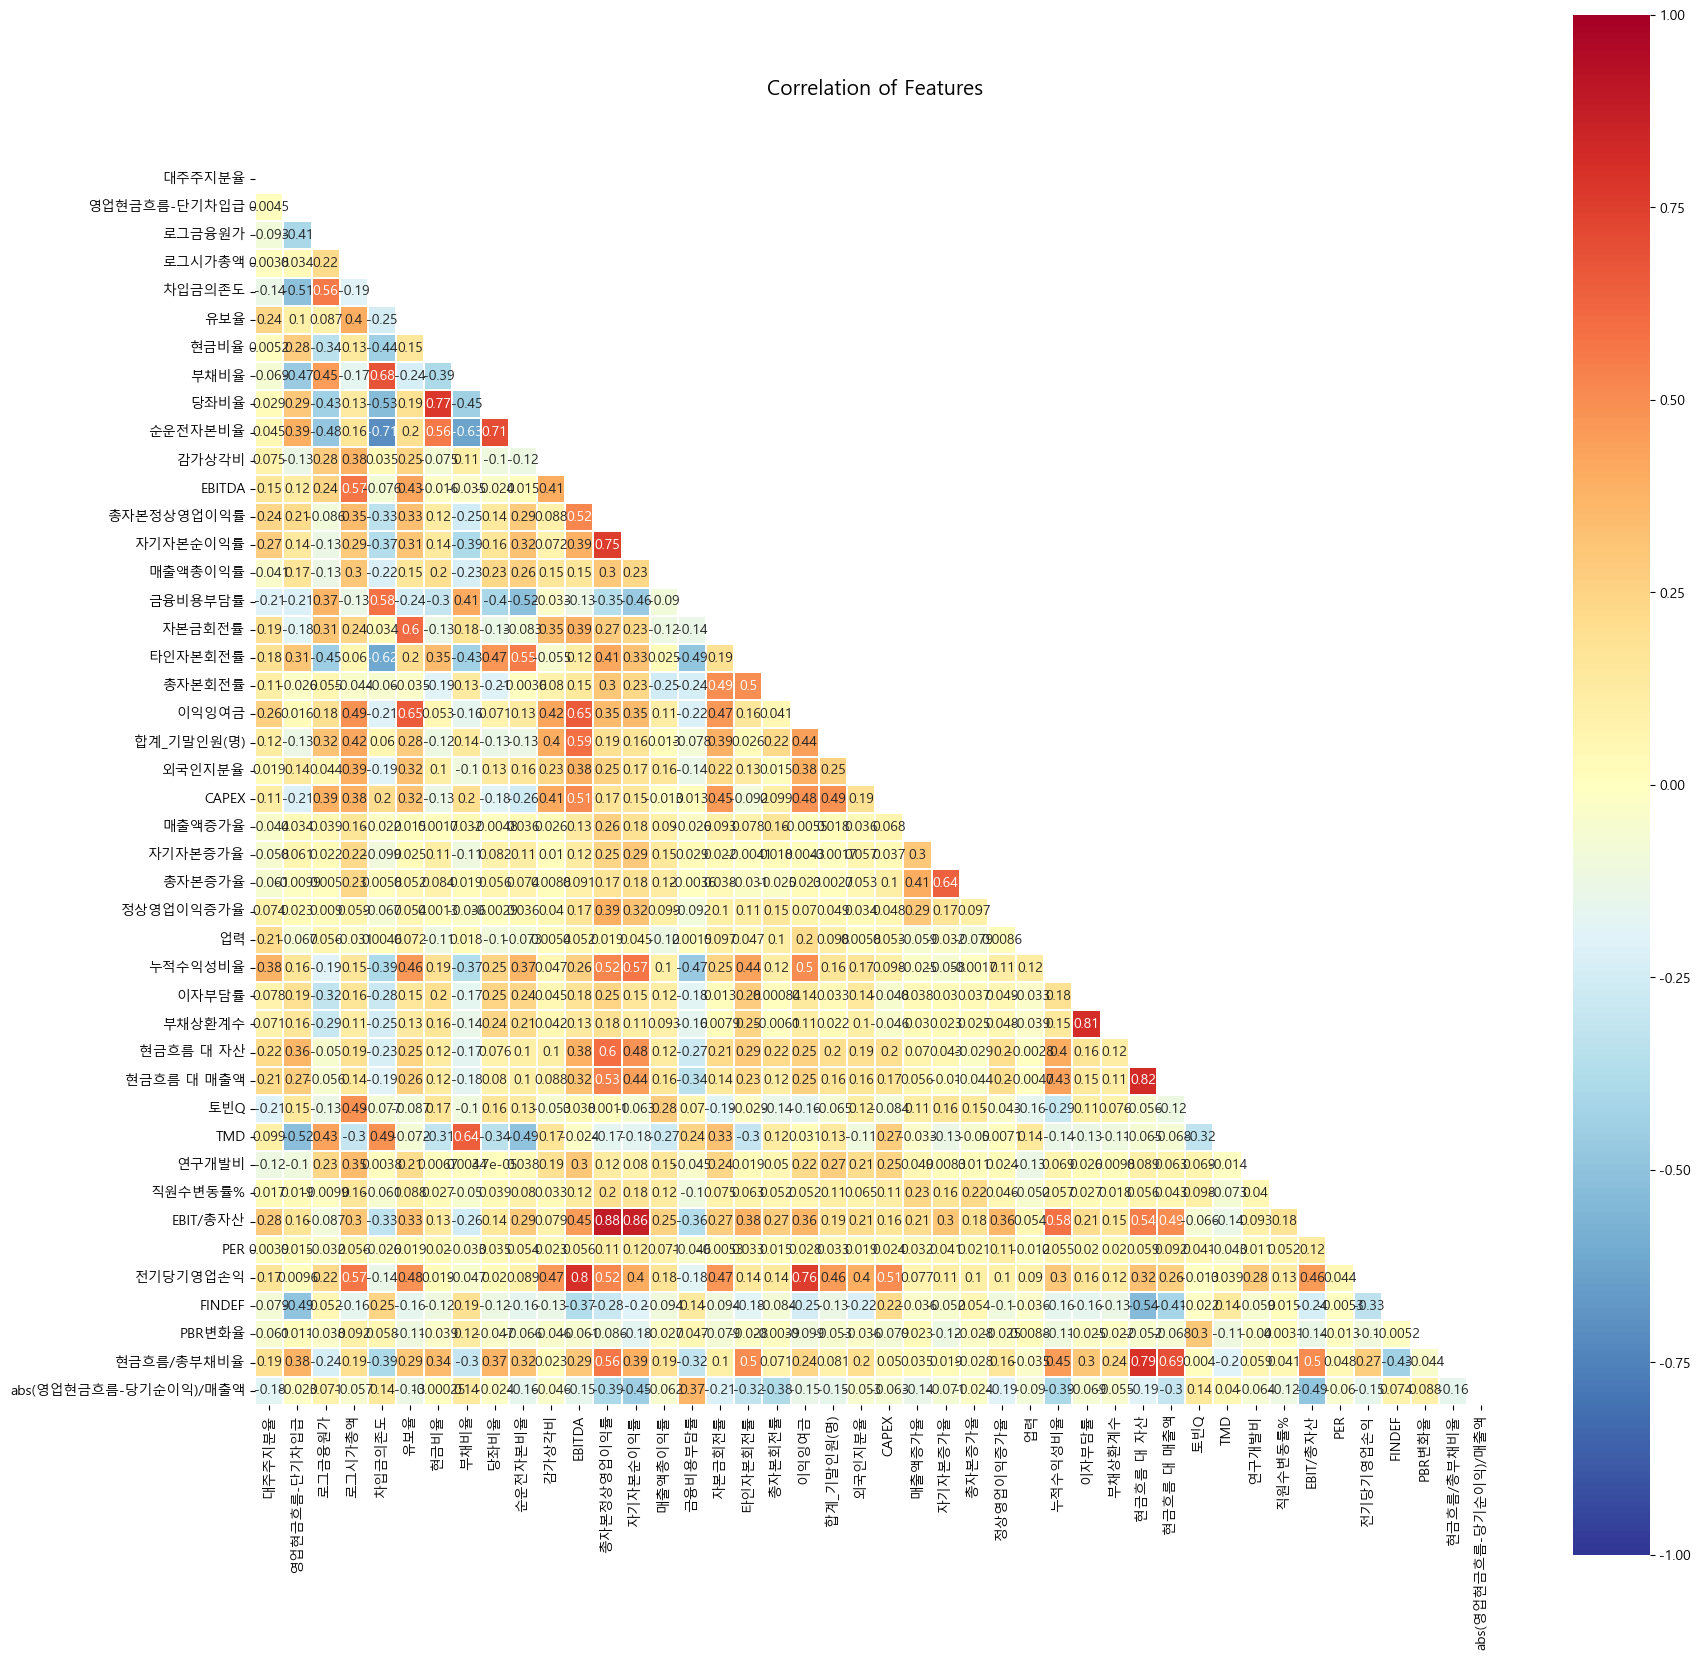

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

colormap = plt.cm.hot

corr = 수치형_col.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(20, 20))
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family="Malgun Gothic")
plt.title("Correlation of Features", y=1.05, size=15)
sns.heatmap(corr, mask=mask, linewidths=0.1, vmax=1.0, vmin=-1.0, square=True,
            cmap='RdYlBu_r', linecolor="white", annot=True, annot_kws={'size': 10})

In [107]:
last_col = 명목형_col[0]+vif['features'].to_list()

In [108]:
train = train[last_col]
test = test[last_col]

In [109]:
train.to_csv('./datasets/통계검증완료/코스닥_standar_train.csv',encoding='utf-8-sig')
test.to_csv('./datasets/통계검증완료/코스닥_standar_test.csv',encoding='utf-8-sig')